In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loadin data
df = pd.read_csv('./data/data_jobs.csv')

In [79]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
df[['job_title_short', 'job_location']]

In [ ]:
df.iloc[90:100, 0:2]

In [ ]:
df[['job_title_short', 'job_location']].iloc[90:100]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [ ]:
df.shape

In [ ]:
df.job_title_short == 'Data Analyst'

In [ ]:
df[(df.job_title_short == 'Data Analyst') & (df.salary_year_avg > 100000)]

In [ ]:
df[(df.job_title_short == 'Data Analyst') & (df.salary_year_avg.notna())]

# Cleaning data

In [ ]:
type(df.job_posted_date[0])

In [9]:
df.job_posted_date = pd.to_datetime(df.job_posted_date)
# df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [ ]:
df.job_posted_date.dt.month

In [ ]:
df['job_posted_month'] = df.job_posted_date.dt.month

In [ ]:
df.info()

In [ ]:
df.sort_values(by='job_posted_date', inplace=True)

In [ ]:
df.info()

In [ ]:
df.drop(labels='salary_hour_avg', axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df.dropna(subset=['salary_year_avg'], inplace=True)

In [ ]:
df.info()

# Pandas: Analysis

In [43]:
df.describe()

,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [44]:
df.salary_year_avg.median()

np.float64(115000.0)

In [45]:
df['salary_year_avg'].median()

np.float64(115000.0)

In [46]:
df.describe()

,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [50]:
df['salary_year_avg'].min()

np.float64(15000.0)

In [51]:
min_year_salary = df['salary_year_avg'].idxmin()

In [52]:
df.iloc[min_year_salary]

job_title_short                                              Data Engineer
job_title                                           Data Engineer - Hadoop
job_location                                                        Brazil
job_via                                                       via LinkedIn
job_schedule_type                                                Full-time
job_work_from_home                                                   False
search_location                                                     Brazil
job_posted_date                                        2023-12-09 10:05:30
job_no_degree_mention                                                 True
job_health_insurance                                                 False
job_country                                                         Brazil
salary_rate                                                           year
salary_year_avg                                                    15000.0
salary_hour_avg          

In [53]:
df.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [54]:
df.job_title_short.value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [62]:
df.groupby(by='job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [69]:
df.groupby(by=['job_title_short', 'job_country'])['salary_year_avg'].median()

job_title_short    job_country
Business Analyst   Afghanistan        NaN
                   Albania            NaN
                   Algeria            NaN
                   Angola             NaN
                   Argentina      71100.0
                                   ...   
Software Engineer  Venezuela          NaN
                   Vietnam        53600.0
                   Yemen              NaN
                   Zambia             NaN
                   Zimbabwe           NaN
Name: salary_year_avg, Length: 1387, dtype: float64

In [108]:
# Тестирую свои задачи
# Метод .reset_index() используется для сброса индексов в DataFrame. В контексте группировки, когда вы вызываете groupby().size(), результатом будет DataFrame, где значения группировки (в нашем случае, job_title_short) становятся индексом. .reset_index() переносит этот индекс обратно в обычную колонку, что делает DataFrame более удобным для чтения и дальнейшей обработки.

kazakhstan_counts = df[df['job_country'] == 'Kazakhstan'].groupby('job_title_short').size().reset_index(name='count_in_kazakhstan')
kazakhstan_median_salary = df[df['job_country'] == 'Kazakhstan'].groupby('job_title_short')['salary_year_avg'].median().reset_index(name='avg_salary_job_yearly')
kazakhstan = pd.merge(kazakhstan_counts, kazakhstan_median_salary, on='job_title_short', how='left')


uzbekistan_counts = df[df['job_country'] == 'Uzbekistan'].groupby('job_title_short').size().reset_index(name='count_in_uzbekistan')
uzbekistan_median_salary = df[df['job_country'] == 'Uzbekistan'].groupby('job_title_short')['salary_year_avg'].median().reset_index(name='avg_salary_job_yearly')
uzbekistan = pd.merge(uzbekistan_counts, uzbekistan_median_salary, on='job_title_short', how='left')


usa_counts = df[df['job_country'] == 'United States'].groupby('job_title_short').size().reset_index(name='count_in_usa')
usa_median_salary = df[df['job_country'] == 'United States'].groupby('job_title_short')['salary_year_avg'].median().reset_index(name='avg_salary_job_yearly')
usa = pd.merge(usa_counts, usa_median_salary, on='job_title_short', how='left')

# kazakhstan_counts содержит количество профессий для Kazakhstan, а uzbekistan_counts — для Uzbekistan.
# pd.merge() объединяет эти два DataFrame по колонке job_title_short, создавая новую таблицу compare.
# Параметр how='outer' сохраняет все профессии из обоих DataFrame. fillna(0) заменяет отсутствующие значения на 0.
compare = pd.merge(kazakhstan, uzbekistan, on='job_title_short', how='outer').fillna(0)

# pd.merge() принимает только два DataFrame за раз. Для объединения трех таблиц можно последовательно объединить два DataFrame, а затем добавить третий.
compare = pd.merge(compare, usa, on='job_title_short', how='outer').fillna(0)

compare

,job_title_short,count_in_kazakhstan,avg_salary_job_yearly_x,count_in_uzbekistan,avg_salary_job_yearly_y,count_in_usa,avg_salary_job_yearly
0,Business Analyst,26,0.0,55,0.0,7382,90000.0
1,Cloud Engineer,13,64800.0,3,0.0,423,116100.0
2,Data Analyst,74,105000.0,39,0.0,67816,90000.0
3,Data Engineer,191,0.0,49,0.0,35080,125000.0
4,Data Scientist,122,0.0,50,30750.0,58830,130000.0
5,Machine Learning Engineer,31,64800.0,22,0.0,921,150000.0
6,Senior Data Analyst,16,111175.0,15,0.0,11791,110000.0
7,Senior Data Engineer,82,0.0,54,0.0,9289,150000.0
8,Senior Data Scientist,26,131575.0,19,0.0,12946,155000.0
9,Software Engineer,49,33455.0,27,0.0,1814,130000.0


In [139]:
# Так работает
df.groupby(by='job_title_short')['salary_year_avg'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

,min,max,median
job_title_short,,,
Senior Data Scientist,45000.0,890000.0,155500.0
Senior Data Engineer,35000.0,425000.0,147500.0
Data Scientist,27000.0,960000.0,127500.0
Data Engineer,15000.0,525000.0,125000.0
Senior Data Analyst,30000.0,425000.0,111175.0
Machine Learning Engineer,30000.0,325000.0,106415.0
Software Engineer,28000.0,375000.0,99150.0
Cloud Engineer,42000.0,280000.0,90000.0
Data Analyst,25000.0,650000.0,90000.0


In [138]:
# Так не работает
df.groupby(by='job_title_short')['salary_year_avg'].agg(['min', 'max', 'median']).sort_values(by='median')

,min,max,median
job_title_short,,,
Business Analyst,16500.0,387460.0,85000.0
Cloud Engineer,42000.0,280000.0,90000.0
Data Analyst,25000.0,650000.0,90000.0
Software Engineer,28000.0,375000.0,99150.0
Machine Learning Engineer,30000.0,325000.0,106415.0
Senior Data Analyst,30000.0,425000.0,111175.0
Data Engineer,15000.0,525000.0,125000.0
Data Scientist,27000.0,960000.0,127500.0
Senior Data Engineer,35000.0,425000.0,147500.0


In [ ]:
# (df['job_country'] == 'Kazakhstan') — фильтрует строки по стране, оставляя только строки, где job_country равен 'Kazakhstan'.
# (~df['salary_year_avg'].isna()) — добавляет условие, чтобы исключить строки, где salary_year_avg содержит NaN. Здесь ~ означает отрицание, а isna() проверяет на NaN.
# Объединяем условия с & (логическое "И"), чтобы оба условия выполнялись одновременно.
# [['job_title_short', 'salary_year_avg']] — оставляет только нужные столбцы.
df_kazakhstan = df[(df['job_country'] == 'Kazakhstan') & (~df['salary_year_avg'].isna())][['job_title_short', 'salary_year_avg']]

df_kazakhstan

,job_title_short,salary_year_avg
49645,Machine Learning Engineer,64800.0
122514,Senior Data Scientist,157500.0
487737,Data Analyst,118640.0
503952,Data Analyst,53014.0
540307,Cloud Engineer,64800.0
544899,Senior Data Scientist,105650.0
567167,Senior Data Analyst,111175.0
716706,Software Engineer,33455.0
729314,Data Analyst,105000.0
752936,Machine Learning Engineer,64800.0


In [123]:
df.job_country.value_counts().iloc[20:30]

job_country
Austria                 9710
Malaysia                9219
Argentina               8736
Chile                   8118
Hong Kong               7844
Colombia                7784
United Arab Emirates    7541
Brazil                  7032
Denmark                 6952
Costa Rica              6357
Name: count, dtype: int64

In [126]:
df.job_country.isin(['Maldives']).any()

np.True_

In [ ]:
us_jobs = df[df['job_country'] == 'United States']

In [131]:
us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]
us_jobs.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"['r', 'python', 'sql', 't-sql', 'hadoop', 'spa...","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"['golang', 'scala', 'python', 'java', 'hadoop'...","{'libraries': ['hadoop', 'spark'], 'programmin..."


In [132]:
us_jobs.groupby('job_title_short')['salary_year_avg'].count()

job_title_short
Business Analyst              431
Cloud Engineer                 20
Data Analyst                 4350
Data Engineer                2915
Data Scientist               4553
Machine Learning Engineer     128
Senior Data Analyst           913
Senior Data Engineer         1058
Senior Data Scientist        1241
Software Engineer             157
Name: salary_year_avg, dtype: int64

In [133]:
us_jobs.groupby('job_title_short').count()

,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_title_short,,,,,,,,,,,,,,,,
Business Analyst,431,425,431,430,431,431,431,431,431,431,431,431,0,431,355,355
Cloud Engineer,20,20,20,19,20,20,20,20,20,20,20,20,0,20,18,18
Data Analyst,4350,4285,4350,4342,4350,4350,4350,4350,4350,4350,4350,4350,0,4350,3868,3868
Data Engineer,2915,2869,2915,2915,2915,2915,2915,2915,2915,2915,2915,2915,0,2915,2828,2828
Data Scientist,4553,4498,4553,4550,4553,4553,4553,4553,4553,4553,4553,4553,0,4553,4025,4025
Machine Learning Engineer,128,128,128,128,128,128,128,128,128,128,128,128,0,128,117,117
Senior Data Analyst,913,903,913,913,913,913,913,913,913,913,913,913,0,913,821,821
Senior Data Engineer,1058,1041,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,0,1058,1044,1044
Senior Data Scientist,1241,1220,1241,1240,1241,1241,1241,1241,1241,1241,1241,1241,0,1241,1149,1149


# Matplotlib

In [ ]:
!pip list

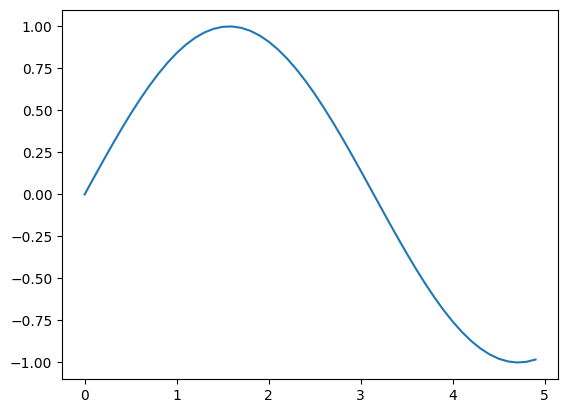

In [144]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

## Matplotlib: Plotting

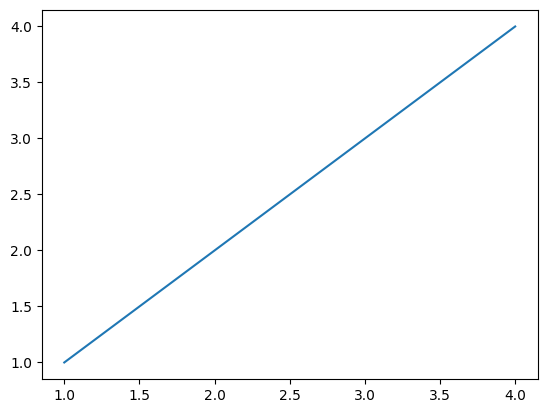

In [149]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]


plt.plot(x, y)
plt.show()

In [153]:
df.job_posted_date.head()

0    2023-06-16 13:44:15
1    2023-01-14 13:18:07
2    2023-10-10 13:14:55
3    2023-07-04 13:01:41
4    2023-08-07 14:29:36
Name: job_posted_date, dtype: object

In [6]:
date_counts = df.job_posted_date.value_counts()
date_counts = date_counts.sort_index()

In [7]:
date_counts

job_posted_date
2023-01-01 00:00:04    1
2023-01-01 00:00:07    1
2023-01-01 00:00:22    1
2023-01-01 00:00:24    1
2023-01-01 00:00:27    1
                      ..
2023-12-31 23:40:18    2
2023-12-31 23:40:22    2
2023-12-31 23:40:31    2
2023-12-31 23:40:32    1
2023-12-31 23:59:58    2
Name: count, Length: 607192, dtype: int64

In [10]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [14]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

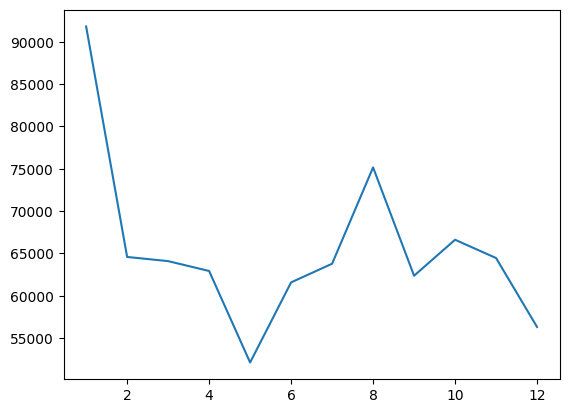

In [15]:
plt.plot(monthly_counts.index, monthly_counts)

# Series vs DataFrame
- One-dimensional
- Indexed
- Diverse Data types


In [17]:
pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])

a    10
b    20
c    30
d    40
e    50
dtype: int64

## Bar Chart

In [6]:
job_counts = df.job_title_short.value_counts()

<BarContainer object of 10 artists>

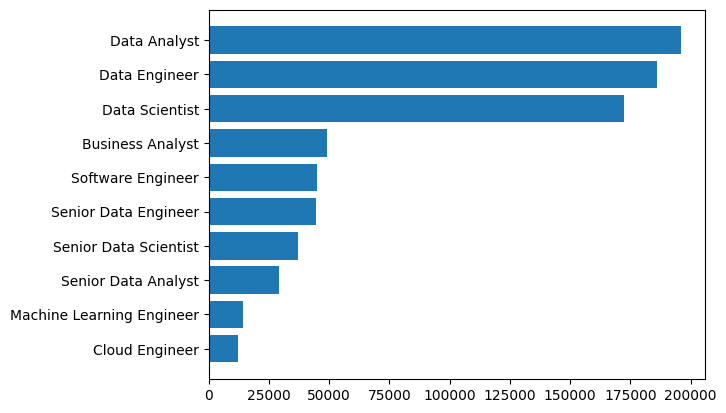

In [7]:
job_counts.sort_values(ascending=True, inplace=True)
plt.barh(job_counts.index, job_counts)

## Matplotlib: Labeling

<BarContainer object of 10 artists>

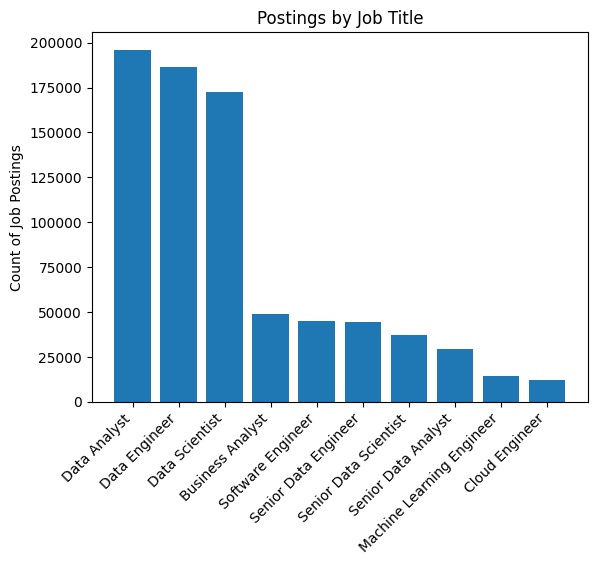

In [8]:
job_counts.sort_values(ascending=False, inplace=True)
plt.title(label='Postings by Job Title')
plt.ylabel(ylabel='Count of Job Postings')
# ha - horizontal alignt
plt.xticks(rotation=45, ha='right')
plt.bar(job_counts.index, job_counts)

## Matplotlib & Pandas

Text(0.5, 0, '')

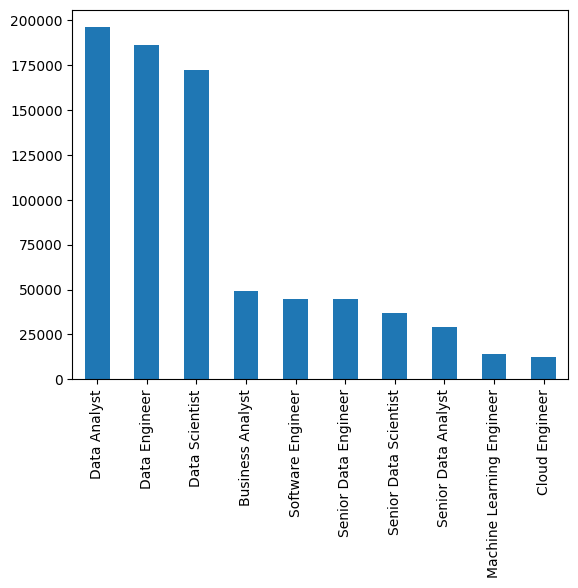

In [13]:
job_counts.plot(kind='bar')
plt.xlabel('')

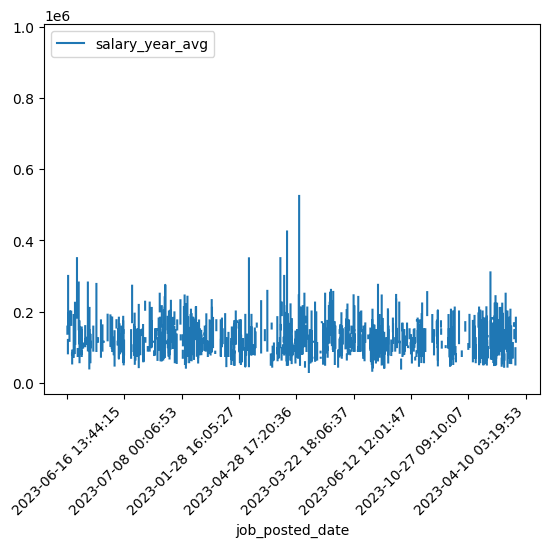

In [11]:
# DataFrame
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')
plt.xticks(rotation=45)
plt.show()


# Exercise: Matplolib Basics

In [15]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True)

In [14]:
df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)

job_title_short
Business Analyst              91082.612833
Data Analyst                  93841.907854
Cloud Engineer               111268.453846
Software Engineer            113393.760054
Senior Data Analyst          113911.363665
Machine Learning Engineer    126774.315972
Data Engineer                130125.604250
Data Scientist               135988.837171
Senior Data Engineer         145840.611624
Senior Data Scientist        154206.292996
Name: salary_year_avg, dtype: float64

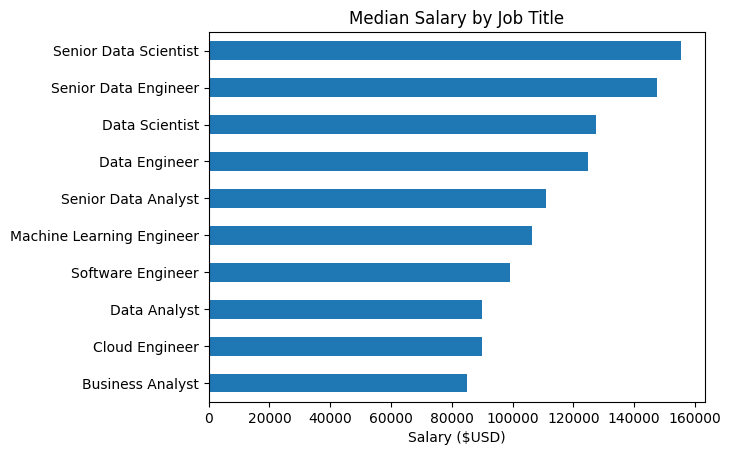

In [18]:
job_salary.plot(kind='barh')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Median Salary by Job Title')
plt.show()